In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
import seaborn as sns

from mpl_toolkits.mplot3d import Axes3D
sns.set(style='whitegrid', context='notebook', palette='Set2')

In [2]:
# read CSV
df_data  = pd.read_csv('../../data/sample.csv')
df_data = df_data.drop(columns=['wy'])
df_data = df_data.sort_values(by=['id', 'frame'])
df_data['new_frame'] = df_data['frame']/20
df_data['new_frame'] = df_data['new_frame'].astype(np.int64)

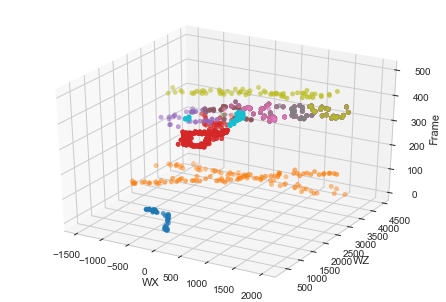

In [10]:
csv_data = df_data[df_data.frame < 500]

fig = plt.figure()
ax = Axes3D(fig)

ax.set_xlabel("WX")
ax.set_ylabel("WZ")
ax.set_zlabel("Frame")

d1 = csv_data['wx']
d2 = csv_data['wz']
d3 = csv_data['frame']
i = csv_data['id']

ax.scatter(d1, d2, d3, c=i, cmap=plt.get_cmap("tab10"))
plt.show()

2/3[s]を1タイムステップとする

In [47]:
df_data = df_data.drop_duplicates(subset=['wx', 'wz', 'frame'])
df_data = df_data.groupby(['id', 'new_frame']).mean()
df_data = df_data.reset_index()

速度を求める

In [48]:
df_velocity = pd.DataFrame()
for i in range(max(df_data['id'])):
    person = df_data[df_data.id == i]
    person_diff = person.diff().fillna(0.)
    person_diff['dist'] = np.sqrt(person_diff.wx**2 + person_diff.wz**2)
    person_diff['vel'] = person_diff.dist / (person_diff.frame / 30)
    df_velocity = df_velocity.append(person_diff)

In [49]:
df_data['vel'] = df_velocity['vel']
df_data['dist'] = df_velocity['dist']

一番近い障害物(人)の距離を求める

In [51]:
df_dataset = df_dataset.reset_index()

In [ ]:
df_minD = pd.DataFrame()
for i in df_dataset.new_frame.unique():
    zero_data = df_dataset[df_dataset['new_frame']==i][['id', 'wx', 'wz']]
    pd_dist = pd.DataFrame(squareform(pdist(zero_data.iloc[:, 1:])), columns=zero_data.id.unique(), index=zero_data.id.unique())
    pd_dist[pd_dist > .01].min()
    df_minD = df_minD.append(pd.DataFrame(pd_dist[pd_dist > .01].min()))

df_dataset['minD'] = df_minD.reset_index()[0]

In [ ]:
df_dataset.head()

In [ ]:
df_dataset.to_csv("some.csv")